## *Required Libraries*

In [17]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

## *Loading the Data*

In [18]:
train=pd.read_csv("Data/Train.csv")
test=pd.read_csv("Data/Test.csv")
waste=pd.read_csv("Data/waste_management.csv")
water=pd.read_csv("Data/water_sources.csv")
toilet=pd.read_csv("Data/toilets.csv")

In [19]:
train.head()

,ID,Total,Location,Category_Health_Facility_UUID,Disease,Month,Year,Transformed_Latitude,Transformed_Longitude
0,ID_3a11929e-3317-476d-99f7-1bd9fb58f018_12_202...,0.0,ID_3a11929e-3317-476d-99f7-1bd9fb58f018,a9280aca-c872-46f5-ada7-4a7cc31cf6ec,Dysentery,12,2022,-8.62982,68.23267
1,ID_3a11929e-3317-476d-99f7-1bd9fb58f018_12_202...,0.0,ID_3a11929e-3317-476d-99f7-1bd9fb58f018,a9280aca-c872-46f5-ada7-4a7cc31cf6ec,Typhoid,12,2022,-8.62982,68.23267
2,ID_3a11929e-3317-476d-99f7-1bd9fb58f018_12_202...,0.0,ID_3a11929e-3317-476d-99f7-1bd9fb58f018,a9280aca-c872-46f5-ada7-4a7cc31cf6ec,Diarrhea,12,2022,-8.62982,68.23267
3,ID_3a11929e-3317-476d-99f7-1bd9fb58f018_12_202...,0.0,ID_3a11929e-3317-476d-99f7-1bd9fb58f018,a9280aca-c872-46f5-ada7-4a7cc31cf6ec,Diarrhea,12,2022,-8.62982,68.23267
4,ID_3a11929e-3317-476d-99f7-1bd9fb58f018_12_202...,0.0,ID_3a11929e-3317-476d-99f7-1bd9fb58f018,a9280aca-c872-46f5-ada7-4a7cc31cf6ec,Diarrhea,12,2022,-8.62982,68.23267


In [20]:
print("Train Data Shape -",train.shape)
print("Test Data Shape -",test.shape)
print("Waste Data Shape -",waste.shape)
print("Water Data Shape -",water.shape)
print("Toilet Data Shape -",toilet.shape)

Train Data Shape - (23848, 9)
Test Data Shape - (4872, 8)
Waste Data Shape - (5100, 43)
Water Data Shape - (10560, 43)
Toilet Data Shape - (10680, 43)


In [21]:
train.dtypes

ID                                object
Total                            float64
Location                          object
Category_Health_Facility_UUID     object
Disease                           object
Month                              int64
Year                               int64
Transformed_Latitude             float64
Transformed_Longitude            float64
dtype: object

In [22]:
train.describe()

,Total,Month,Year,Transformed_Latitude,Transformed_Longitude
count,23847.000000,23848.000000,23848.000000,23848.00000,23848.000000
mean,8.355600,6.568643,2020.610282,-8.61252,68.242682
std,28.076713,3.445577,1.133108,0.04251,0.029114
min,0.000000,1.000000,2019.000000,-8.71376,68.169720
25%,0.000000,4.000000,2020.000000,-8.62656,68.224740
50%,0.000000,7.000000,2021.000000,-8.61740,68.237620
75%,3.000000,10.000000,2022.000000,-8.59431,68.257640
max,489.000000,12.000000,2022.000000,-8.49681,68.328390


## *EDA and Data Preprocessing*

### *Handling Missing Data*

In [23]:
train.isna().sum()

ID                               0
Total                            1
Location                         0
Category_Health_Facility_UUID    0
Disease                          0
Month                            0
Year                             0
Transformed_Latitude             0
Transformed_Longitude            0
dtype: int64

In [24]:
train.dropna(inplace=True)

### *Handling Duplicate Values*

In [25]:
train.duplicated().sum()

6675

In [26]:
train.drop_duplicates(inplace=True)

### *Data Visualization*

*Histplot for frequency distribution*

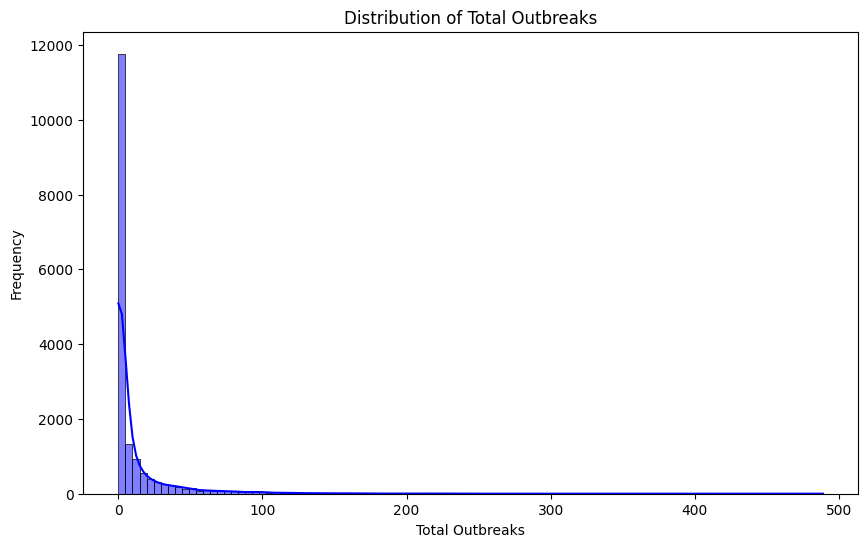

In [27]:
plt.figure(figsize=(10, 6))
sns.histplot(train['Total'], bins=100, kde=True, color='blue')
plt.title('Distribution of Total Outbreaks')
plt.xlabel('Total Outbreaks')
plt.ylabel('Frequency')
plt.show()

*Boxplot for Outlier detection*

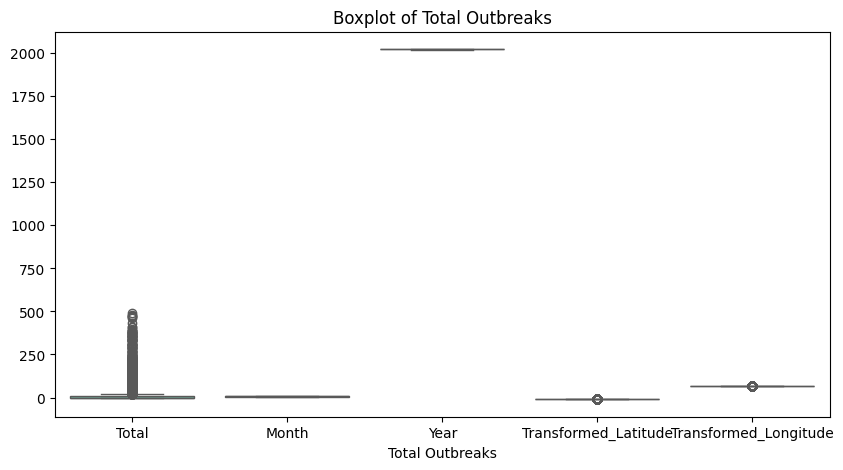

In [28]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=train, orient='v', palette='Set2')
plt.title('Boxplot of Total Outbreaks')
plt.xlabel('Total Outbreaks')
plt.show()

### *Data Encoding*

In [29]:
train['Disease'].value_counts()

Disease
Diarrhea            4336
Malaria             4165
Typhoid             2168
Intestinal Worms    2168
Schistosomiasis     2167
Dysentery           2144
Cholera               24
Name: count, dtype: int64

In [30]:
label_encoder = LabelEncoder()
train['Encoded'] = label_encoder.fit_transform(train['Disease'])
train['Category_Health_Facility_Encoded'] = label_encoder.fit_transform(train['Category_Health_Facility_UUID'])